Building prefix dict from C:\Users\eric-i7\pythonwork\Crawler\dictionary\dict.txt.big.txt ...
Loading model from cache C:\Users\eric-i7\AppData\Local\Temp\jieba.u4e838200ecbe5b3ed812db797a4c987c.cache


標題：醫聯網https://med-net.com
網址：/url?q=https://med-net.com/&sa=U&ved=2ahUKEwiyufeL9rzmAhXayosBHY_vD50QFjAAegQIBxAB&usg=AOvVaw3bo9p4KD5jRFrEgjq-XN80
標題：醫聯網- Home | Facebookhttps://www.facebook.com › ... › Website › Health & Wellness Website
網址：/url?q=https://www.facebook.com/MednetTW/&sa=U&ved=2ahUKEwiyufeL9rzmAhXayosBHY_vD50QFjAHegQIAhAB&usg=AOvVaw3UNAVDk3Y9_yx-LQdTPgKt
標題：全台第一個健康檢查及健康促進平台—醫聯網，發佈「Bigdata + AI健診 ...https://www.storm.mg › 風生活
網址：/url?q=https://www.storm.mg/lifestyle/441371&sa=U&ved=2ahUKEwiyufeL9rzmAhXayosBHY_vD50QFjAIegQIBRAB&usg=AOvVaw3m5ZAlQRL1Y4aS-LtVVdyR
標題：台韓數位醫療產業攜手，醫聯網平台和韓大熊製藥集團簽約合作-風傳媒https://www.storm.mg › 品味生活
網址：/url?q=https://www.storm.mg/stylish/482833&sa=U&ved=2ahUKEwiyufeL9rzmAhXayosBHY_vD50QFjAJegQIBBAB&usg=AOvVaw217o0_laGHEp93TJBiYOxJ
標題：智慧經營／眾匯智能健康董座王欽堂要做健康守門人打造醫聯網顛覆 ...https://money.udn.com › 觀點
網址：/url?q=https://money.udn.com/money/story/8944/3790347&sa=U&ved=2ahUKEwiyufeL9rzmAhXayosBHY_vD50QFjAKegQIBhAB&usg=AOvVaw3o_qAxo0dlb-sTe25SPu2W
標題：醫聯網- 優質新創人才招募

Loading model cost 1.582 seconds.
Prefix dict has been built succesfully.


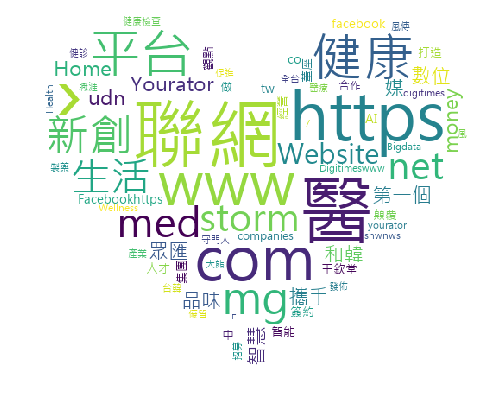

In [2]:
# NewsCloud3   文字雲結合google search

import requests
from bs4 import BeautifulSoup

# Google 搜尋 URL
google_url = 'https://www.google.com.tw/search'

# 查詢參數
my_params = {'q': '醫聯網'}

# 下載 Google 搜尋結果
r = requests.get(google_url, params = my_params)

# 確認是否下載成功
if r.status_code == requests.codes.ok:
  # 以 BeautifulSoup 解析 HTML 原始碼
  soup = BeautifulSoup(r.text, 'html.parser')

  # 觀察 HTML 原始碼
  #print(soup.prettify())

  # 以 CSS 的選擇器來抓取 Google 的搜尋結果
  items = soup.select('div.kCrYT > a[href^="/url"]')
 
  for i in items:
    # 標題
    print("標題：" + i.text)
    # 網址
    print("網址：" + i.get('href'))
#-----------------------------------------------

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba
import numpy as np
from collections import Counter

#讀取文字檔資料
#text = open('news1.txt', "r",encoding="utf-8").read()  #讀文字資料

#讀取Google資料

text = ''
for i in items:
    # 標題
    text = text + i.text
print( text)

jieba.set_dictionary('dictionary/dict.txt.big.txt')
with open('dictionary/stopWord_cloud.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
#with open('dictionary/stopWord_cloudmod.txt', 'r', encoding='utf-8-sig') as f:  #設定停用詞
    stops = f.read().split('\n')   
terms = []  #儲存字詞
for t in jieba.cut(text, cut_all=False):  #拆解句子為字詞
    if t not in stops:  #不是停用詞
        terms.append(t)
diction = Counter(terms)
# 可列印詞的統計數量
#print(diction)

#font = "C:\\Windows\\Fonts\\simsun.ttc"  #設定字型(宋體)
font = "C:\\Windows\\Fonts\\MSJH.ttf"  #設定字型(宋體)
#wordcloud = WordCloud(font_path="C:\\Windows\\Fonts\\simsun.ttc")

mask = np.array(Image.open("heart.png"))  #設定文字雲形狀 
#wordcloud = WordCloud(font_path=font) 
wordcloud = WordCloud(background_color="white",mask=mask, font_path=font)  #背景顏色預設黑色,改為白色,字體為宋體
wordcloud.generate_from_frequencies(diction)  #產生文字雲

#產生圖片
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file("news_Wordcloud.png")  #存檔